# Classification of Breast Cancer Tumours - Data Wrangling and EDA

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

#stats 
from scipy import stats
import statsmodels.api as sm # importing 'statsmodel' for statistical analysis
from statsmodels.graphics.api import abline_plot # statistical plots 
from sklearn.metrics import mean_squared_error, r2_score # calculating mse and r^2
from sklearn.model_selection import train_test_split #  splits data into training and testing 
from sklearn import linear_model, preprocessing # linear regression model
from sklearn.linear_model import LinearRegression

#interactive data visualisation 
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import plotly.express as px
import plotly.graph_objs as go


## 2. Loading Data

Load Breast Cancer Data
Source: UCI Machine Learning Repository: Breast Cancer Wisconsin (Diagnostic) Data Set
URL: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [2]:
raw_data = pd.read_csv('data.csv')

## 3. Data Wrangling

## 3a. Initial Explorations

In [3]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
raw_data.shape

(569, 33)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
raw_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Summary: The breast cancer data is a table of 33 columns with 529 rows. Each row represents an instance, where each instance is assigned an id (column 1 which are all integer values). Initial look highlights there are actually 31 features for each ID. 30 of these columns are filled with floats, and the diagnosis column has data type 'object'. 

There are a few columns that are related to each other. The data description from the source stated:

    'The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.'

The fields of our data don't quite match the description- this might mean to change of the dataset over time - but, all the column names match the names of the attributes stated in the metadata. 

## 3b. Identify missing data and cleaning up the dataset. 

In [7]:
#identifies which columns have missing data
raw_data.columns[raw_data.isna().any()]

Index(['Unnamed: 32'], dtype='object')

Text(0.5, 14.09375, 'Attributes')

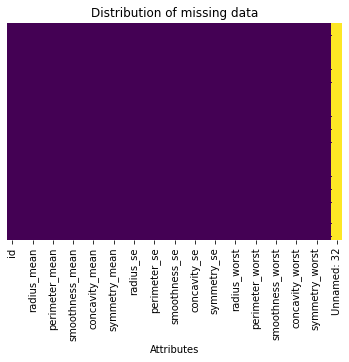

In [8]:
missing_data = sns.heatmap(raw_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
missing_data.set_title('Distribution of missing data')
missing_data.set_xlabel('Attributes')

Only missing data is in the 'Unnamed: 32' column, which isn't providing any useful information. 

In [9]:
#get rid of the unnamed column
clean_data = raw_data.drop('Unnamed: 32', axis = 1)

In [10]:
clean_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
#check for categorical data types- the only categorical data is the diagnosis. 
clean_data.select_dtypes(include = 'object').head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [12]:
# M is malignant and B is benign so let's see how the distribution of B and M values
clean_data.select_dtypes(include = 'object').value_counts()

diagnosis
B            357
M            212
dtype: int64

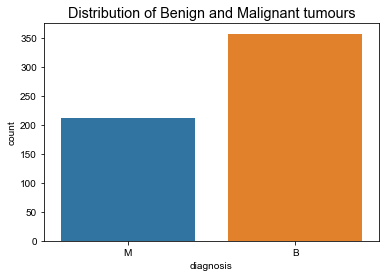

In [13]:
diagnosis = sns.countplot(x='diagnosis', data= clean_data)
sns.set(font_scale=1.2)
diagnosis.set_title('Distribution of Benign and Malignant tumours');
plt.savefig('diagnosis_distribution.png', bbox_inches = 'tight')

Observation: There are more benign samples in the data than malignant. 

In [14]:
clean_data.shape
#check if there are any duplicate data e.g same id number- there aren't any. 
clean_data['id'].nunique()

569

Whilst we can now confirm that all the ID numbers are unique, the ID doesn't really a feature so we should be able to drop this too. 

In [15]:
clean_data = clean_data.drop('id', axis=1)

In [16]:
clean_data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [17]:
df_attributes = clean_data.reindex(sorted(clean_data), axis = 1)

In [18]:
df_attributes.columns

Index(['area_mean', 'area_se', 'area_worst', 'compactness_mean',
       'compactness_se', 'compactness_worst', 'concave points_mean',
       'concave points_se', 'concave points_worst', 'concavity_mean',
       'concavity_se', 'concavity_worst', 'diagnosis',
       'fractal_dimension_mean', 'fractal_dimension_se',
       'fractal_dimension_worst', 'perimeter_mean', 'perimeter_se',
       'perimeter_worst', 'radius_mean', 'radius_se', 'radius_worst',
       'smoothness_mean', 'smoothness_se', 'smoothness_worst', 'symmetry_mean',
       'symmetry_se', 'symmetry_worst', 'texture_mean', 'texture_se',
       'texture_worst'],
      dtype='object')

In [19]:
df_attributes.to_csv('attributes.csv')
clean_data.to_csv('CleanData.csv')

Summary: Turns out there are only 30 features for each tumour sample and these are stored in the df_attribute dataframe. The clean_data dataframe now holds all the data for each instance without the ID numbers. For both of these dataframe, in the diagnosis column the values of M and B have been replaced with 1 and 0 respectively.

Furthermore, we can see that there are 10 distinct features: radius (mean of distances from center to points on the perimeter), texture (standard deviation of gray-scale values), perimeter, area, smoothness (local variation in radius lengths), compactness (perimeter^2 / area - 1.0), concavity (severity of concave portions of the contour), concave points (number of concave portions of the contour), symmetry, fractal dimension ("coastline approximation" - 1). These values have been processed and each feature has 3 columns representing data for them. 

## 4. EDA

## 4a. Identifying outliers

Now we have the data cleaned, next is to look for outliers or any extreneous values. An easy way to do this is to draw boxplots for each of the features and to see if there are clear outliers. 

In [20]:
fig1 = px.box(df_attributes, color = 'diagnosis')
fig1.update_layout(xaxis_title = 'Features',
                   yaxis_title = 'Value')
fig1.show()

Due to the large number of columns and the wider range of scales, this is quite hard to interpret, so we are going to drop area, perimeter, radius and texture related features to get a better look at the rest. 

In [21]:
fig1 = px.box(df_attributes, y=['compactness_mean',
       'compactness_se', 'compactness_worst', 'concave points_mean',
       'concave points_se', 'concave points_worst', 'concavity_mean',
       'concavity_se', 'concavity_worst','fractal_dimension_mean', 'fractal_dimension_se',
       'fractal_dimension_worst','smoothness_mean', 'smoothness_se', 
       'smoothness_worst', 'symmetry_mean',
       'symmetry_se', 'symmetry_worst'],color = 'diagnosis')
fig1.update_layout(width = 1200, xaxis_title = 'Features', 
                   title_text = 'Boxplot of features excluding the radii, perimeter, daignosis, and texture features')
fig1.write_image("boxplot.png")
fig1.show()

It is interesting to note how the mean of the three largest compactness data has a much larger spread of values that the mean compactness. In addition, the spread this data is much larger for malignant tumours than benign. It will be interesting to see if there is an association with large values of compactness of tumours and classificaiton of tumours as malignant or benign. A similar relationship can be seen with mean of the three largest values of concavity and symmetry. 


### i Outliers in concavity

The outliels for most of the features of malignant tumours seem to be much higher than those for benign tumours. An exception being the datapoint of 1.252 for concavity- this is an interesting point to explore. 

In [22]:
clean_data[clean_data['concavity_worst']==1.252]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,B,9.029,17.33,58.79,250.5,0.1066,0.1413,0.313,0.04375,0.2111,...,10.31,22.65,65.5,324.7,0.1482,0.4365,1.252,0.175,0.4228,0.1175


In [23]:
clean_data[clean_data['concavity_mean']==0.4108] 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
152,B,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,0.2548,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.1259


In [24]:
clean_data[clean_data['concavity_se']==0.396] 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
152,B,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,0.2548,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.1259


The two extreme values for the standard error and the mean concavity are from the same instance of benign tumour, whilst the worst concavity for the benign tumour does seem to stand out. This might be an outlier. 

In [25]:
fig1 = px.box(df_attributes, y=['texture_mean', 'texture_se','texture_worst', 'radius_mean', 'radius_se', 'radius_worst'],color = 'diagnosis',
             title='Boxplot of radii and texture of tumours')
fig1.update_layout(xaxis_title = 'Features',
                   yaxis_title = 'Count',)
fig1.write_image("boxplot_radius_texture.png")
fig1.show()

In [26]:
fig1 = px.box(df_attributes, y=['perimeter_mean', 'perimeter_se','perimeter_worst'],color = 'diagnosis')
fig1.update_layout(xaxis_title = 'Features',
                   yaxis_title = 'Count',
                  title='Boxplot of perimeter details of tumours')
fig1.write_image("boxplot_perimeter.png")
fig1.show()

Attributes that seem to have quite distinguishable outliers are: area which also has the largest variance in standard error. Permieter also seems to have quite noticable outliers which explains noticable variance in it's standard error. These two are followed by the radius and the texture of the tumours.

## 4b. Distributions of the features

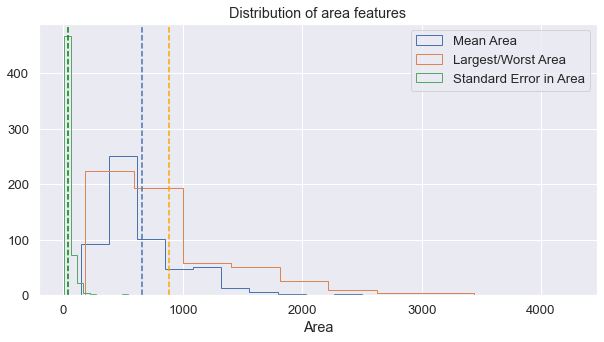

In [27]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(df_attributes['area_mean'], histtype = 'step', label = 'Mean Area')
_ = plt.hist(df_attributes['area_worst'], histtype = 'step', label = 'Largest/Worst Area')
_ = plt.hist(df_attributes['area_se'], histtype = 'step', label = 'Standard Error in Area')
_ = plt.title('Distribution of area features')
_ = plt.xlabel('Area')
_ = plt.legend()
_ = plt.axvline(x=df_attributes['area_mean'].mean(), c ='b', ls='--')
_ = plt.axvline(x=df_attributes['area_worst'].mean(), c ='orange', ls='--')
_ = plt.axvline(x=df_attributes['area_se'].mean(), c ='green', ls='--')
sns.set(font_scale=1.2)
plt.show();

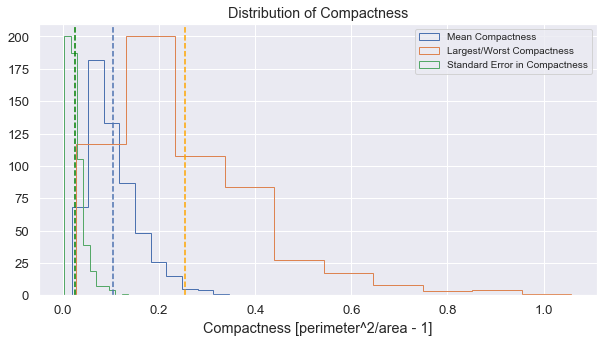

In [28]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(df_attributes['compactness_mean'], histtype = 'step', label = 'Mean Compactness')
_ = plt.hist(df_attributes['compactness_worst'], histtype = 'step', label = 'Largest/Worst Compactness')
_ = plt.hist(df_attributes['compactness_se'], histtype = 'step', label = 'Standard Error in Compactness' )
_ = plt.xlabel('Compactness [perimeter^2/area - 1]')
_ = plt.title('Distribution of Compactness')
_ = plt.legend(prop={'size': 10})
_ = plt.axvline(x=df_attributes['compactness_mean'].mean(), c ='b', ls='--')
_ = plt.axvline(x=df_attributes['compactness_worst'].mean(), c ='orange', ls='--')
_ = plt.axvline(x=df_attributes['compactness_se'].mean(), c ='green', ls='--')
sns.set(font_scale=1.2)
plt.show();

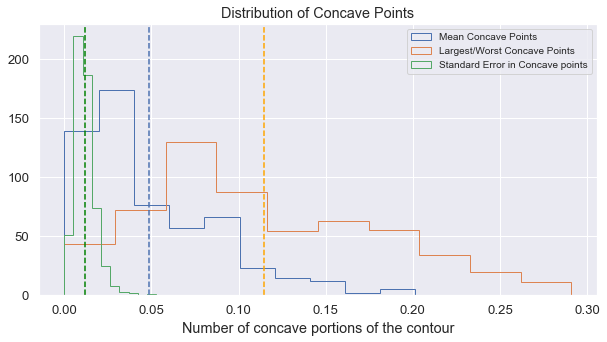

In [29]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(df_attributes['concave points_mean'], histtype = 'step', label = 'Mean Concave Points')
_ = plt.hist(df_attributes['concave points_worst'], histtype = 'step', label = 'Largest/Worst Concave Points')
_ = plt.hist(df_attributes['concave points_se'], histtype = 'step', label = 'Standard Error in Concave points' )
_ = plt.xlabel('Number of concave portions of the contour')
_ = plt.title('Distribution of Concave Points')
_ = plt.legend(prop={'size': 10})
_ = plt.axvline(x=df_attributes['concave points_mean'].mean(), c ='b', ls='--')
_ = plt.axvline(x=df_attributes['concave points_worst'].mean(), c ='orange', ls='--')
_ = plt.axvline(x=df_attributes['concave points_se'].mean(), c ='green', ls='--')
sns.set(font_scale=1.2)
plt.show();

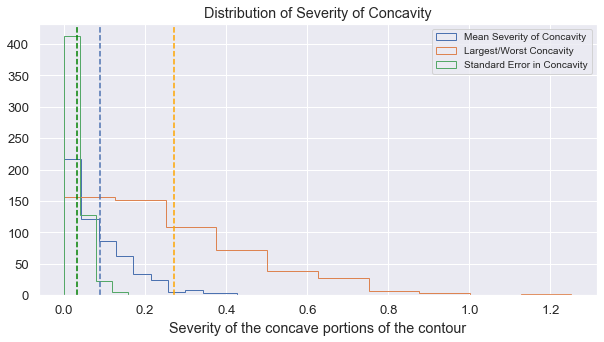

In [30]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(df_attributes['concavity_mean'], histtype = 'step', label = 'Mean Severity of Concavity')
_ = plt.hist(df_attributes['concavity_worst'], histtype = 'step', label = 'Largest/Worst Concavity')
_ = plt.hist(df_attributes['concavity_se'], histtype = 'step', label = 'Standard Error in Concavity' )
_ = plt.xlabel('Severity of the concave portions of the contour')
_ = plt.title('Distribution of Severity of Concavity')
_ = plt.legend()
_ = plt.legend(prop={'size': 10})
_ = plt.axvline(x=df_attributes['concavity_mean'].mean(), c ='b', ls='--')
_ = plt.axvline(x=df_attributes['concavity_worst'].mean(), c ='orange', ls='--')
_ = plt.axvline(x=df_attributes['concavity_se'].mean(), c ='green', ls='--')
sns.set(font_scale=1.2)
plt.show();

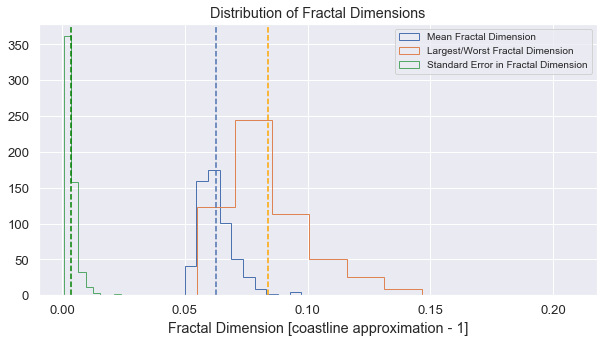

In [31]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(df_attributes['fractal_dimension_mean'], histtype = 'step', label = 'Mean Fractal Dimension')
_ = plt.hist(df_attributes['fractal_dimension_worst'], histtype = 'step', label = 'Largest/Worst Fractal Dimension')
_ = plt.hist(df_attributes['fractal_dimension_se'], histtype = 'step', label = 'Standard Error in Fractal Dimension' )
_ = plt.xlabel('Fractal Dimension [coastline approximation - 1]')
_ = plt.title('Distribution of Fractal Dimensions')
_ = plt.legend()
_ = plt.legend(prop={'size': 10})
_ = plt.axvline(x=df_attributes['fractal_dimension_mean'].mean(), c ='b', ls='--')
_ = plt.axvline(x=df_attributes['fractal_dimension_worst'].mean(), c ='orange', ls='--')
_ = plt.axvline(x=df_attributes['fractal_dimension_se'].mean(), c ='green', ls='--')
sns.set(font_scale=1.2)
plt.show();

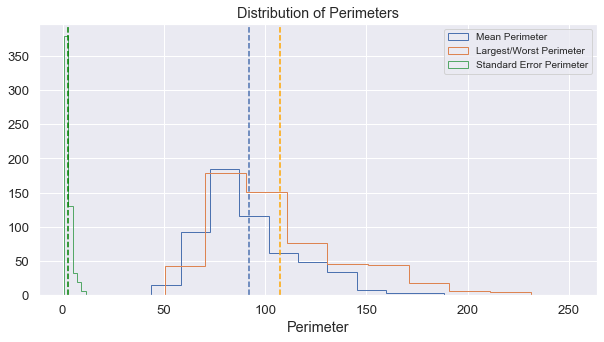

In [32]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(df_attributes['perimeter_mean'], histtype = 'step', label = 'Mean Perimeter')
_ = plt.hist(df_attributes['perimeter_worst'], histtype = 'step', label = 'Largest/Worst Perimeter')
_ = plt.hist(df_attributes['perimeter_se'], histtype = 'step', label = 'Standard Error Perimeter' )
_ = plt.xlabel('Perimeter')
_ = plt.title('Distribution of Perimeters')
_ = plt.legend(prop={'size': 10})
_ = plt.axvline(x=df_attributes['perimeter_mean'].mean(), c ='b', ls='--')
_ = plt.axvline(x=df_attributes['perimeter_worst'].mean(), c ='orange', ls='--')
_ = plt.axvline(x=df_attributes['perimeter_se'].mean(), c ='green', ls='--')
sns.set(font_scale=1.2)
plt.show();

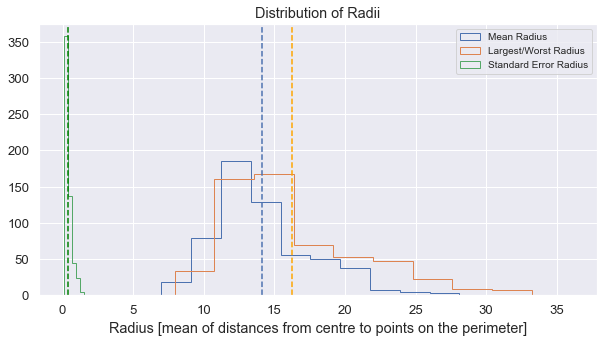

In [33]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(df_attributes['radius_mean'], histtype = 'step', label = 'Mean Radius')
_ = plt.hist(df_attributes['radius_worst'], histtype = 'step', label = 'Largest/Worst Radius')
_ = plt.hist(df_attributes['radius_se'], histtype = 'step', label = 'Standard Error Radius' )
_ = plt.xlabel('Radius [mean of distances from centre to points on the perimeter]')
_ = plt.title('Distribution of Radii')
_ = plt.legend(prop={'size': 10})
_ = plt.axvline(x=df_attributes['radius_mean'].mean(), c ='b', ls='--')
_ = plt.axvline(x=df_attributes['radius_worst'].mean(), c ='orange', ls='--')
_ = plt.axvline(x=df_attributes['radius_se'].mean(), c ='green', ls='--')
sns.set(font_scale=1.2)
plt.show();

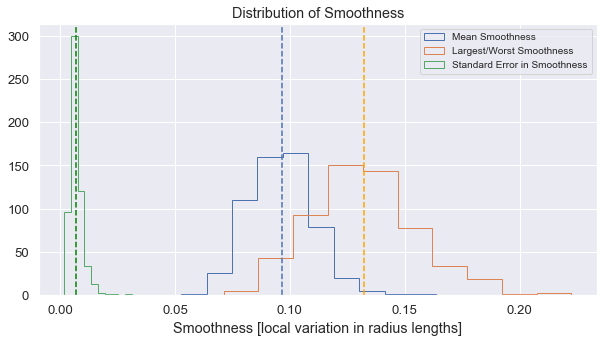

In [34]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(df_attributes['smoothness_mean'], histtype = 'step', label = 'Mean Smoothness')
_ = plt.hist(df_attributes['smoothness_worst'], histtype = 'step', label = 'Largest/Worst Smoothness')
_ = plt.hist(df_attributes['smoothness_se'], histtype = 'step', label = 'Standard Error in Smoothness' )
_ = plt.xlabel('Smoothness [local variation in radius lengths]')
_ = plt.title('Distribution of Smoothness')
_ = plt.legend(prop={'size': 10})
_ = plt.axvline(x=df_attributes['smoothness_mean'].mean(), c ='b', ls='--')
_ = plt.axvline(x=df_attributes['smoothness_worst'].mean(), c ='orange', ls='--')
_ = plt.axvline(x=df_attributes['smoothness_se'].mean(), c ='green', ls='--')
sns.set(font_scale=1.2)
plt.show();

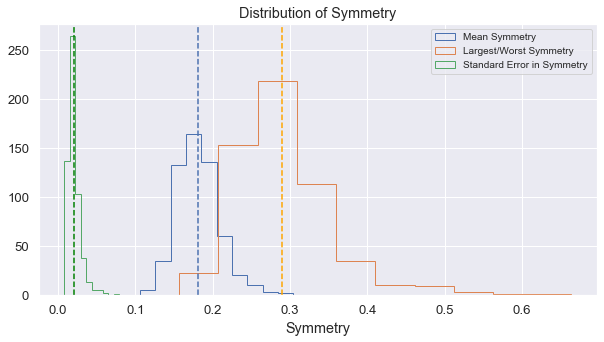

In [35]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(df_attributes['symmetry_mean'], histtype = 'step', label = 'Mean Symmetry')
_ = plt.hist(df_attributes['symmetry_worst'], histtype = 'step', label = 'Largest/Worst Symmetry')
_ = plt.hist(df_attributes['symmetry_se'], histtype = 'step', label = 'Standard Error in Symmetry' )
_ = plt.xlabel('Symmetry')
_ = plt.title('Distribution of Symmetry')
_ = plt.legend(prop={'size': 10})
_ = plt.axvline(x=df_attributes['symmetry_mean'].mean(), c ='b', ls='--')
_ = plt.axvline(x=df_attributes['symmetry_worst'].mean(), c ='orange', ls='--')
_ = plt.axvline(x=df_attributes['symmetry_se'].mean(), c ='green', ls='--')
sns.set(font_scale=1.2)
plt.show();

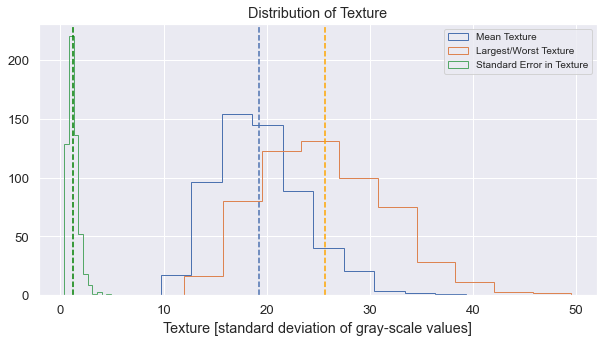

In [36]:
_ = plt.figure(figsize=(10,5))
_ = plt.hist(df_attributes['texture_mean'], histtype = 'step', label = 'Mean Texture')
_ = plt.hist(df_attributes['texture_worst'], histtype = 'step', label = 'Largest/Worst Texture')
_ = plt.hist(df_attributes['texture_se'], histtype = 'step', label = 'Standard Error in Texture' )
_ = plt.xlabel('Texture [standard deviation of gray-scale values]')
_ = plt.title('Distribution of Texture')
__ = plt.legend(prop={'size': 10})
_ = plt.axvline(x=df_attributes['texture_mean'].mean(), c ='b', ls='--')
_ = plt.axvline(x=df_attributes['texture_worst'].mean(), c ='orange', ls='--')
_ = plt.axvline(x=df_attributes['texture_se'].mean(), c ='green', ls='--')
sns.set(font_scale=1.2)
plt.show();

All of the features barring texture, symmetry and smoothness seems to exhibit left skewness. 
The standard error distributions seem to be relatively narrow. 
The mean distributions and the doistributions of the largest/worst features also mirror each other quite closely. 


## 4c.Correlations

In [37]:
df_attributes.corr()

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
area_mean,1.000000,0.800086,0.959213,0.498502,0.212583,0.390410,0.823269,0.372320,0.722017,0.685983,...,0.962746,0.177028,-0.166777,0.123523,0.151293,-0.072497,0.143570,0.321086,-0.066280,0.287489
area_se,0.800086,1.000000,0.811408,0.455653,0.284840,0.283257,0.690299,0.415730,0.538166,0.617427,...,0.757373,0.246552,0.075150,0.125389,0.223970,0.134109,0.074126,0.259845,0.111567,0.196497
area_worst,0.959213,0.811408,1.000000,0.509604,0.199371,0.438296,0.809630,0.342271,0.747419,0.675987,...,0.984015,0.206718,-0.182195,0.209145,0.177193,-0.110343,0.209146,0.343546,-0.083195,0.345842
compactness_mean,0.498502,0.455653,0.509604,1.000000,0.738722,0.865809,0.831135,0.642262,0.815573,0.883121,...,0.535315,0.659123,0.135299,0.565541,0.602641,0.229977,0.510223,0.236702,0.046205,0.248133
compactness_se,0.212583,0.284840,0.199371,0.738722,1.000000,0.678780,0.490424,0.744083,0.483208,0.670279,...,0.204607,0.318943,0.336696,0.227394,0.421659,0.394713,0.277878,0.191975,0.231700,0.143003
compactness_worst,0.390410,0.283257,0.438296,0.865809,0.678780,1.000000,0.667454,0.452888,0.801080,0.754968,...,0.475820,0.472468,-0.055558,0.568187,0.473200,0.060255,0.614441,0.277830,-0.092439,0.360832
concave points_mean,0.823269,0.690299,0.809630,0.831135,0.490424,0.667454,1.000000,0.615634,0.910155,0.921391,...,0.830318,0.553695,0.027653,0.452753,0.462497,0.095351,0.375744,0.293464,0.021480,0.292752
concave points_se,0.372320,0.415730,0.342271,0.642262,0.744083,0.452888,0.615634,1.000000,0.602450,0.683260,...,0.358127,0.380676,0.328429,0.215351,0.393298,0.312780,0.143116,0.163851,0.230283,0.086741
concave points_worst,0.722017,0.538166,0.747419,0.815573,0.483208,0.801080,0.910155,0.602450,1.000000,0.861323,...,0.787424,0.503053,-0.102007,0.547691,0.430297,-0.030413,0.502528,0.295316,-0.119638,0.359755
concavity_mean,0.685983,0.617427,0.675987,0.883121,0.670279,0.754968,0.921391,0.683260,0.861323,1.000000,...,0.688236,0.521984,0.098564,0.448822,0.500667,0.178009,0.409464,0.302418,0.076218,0.299879


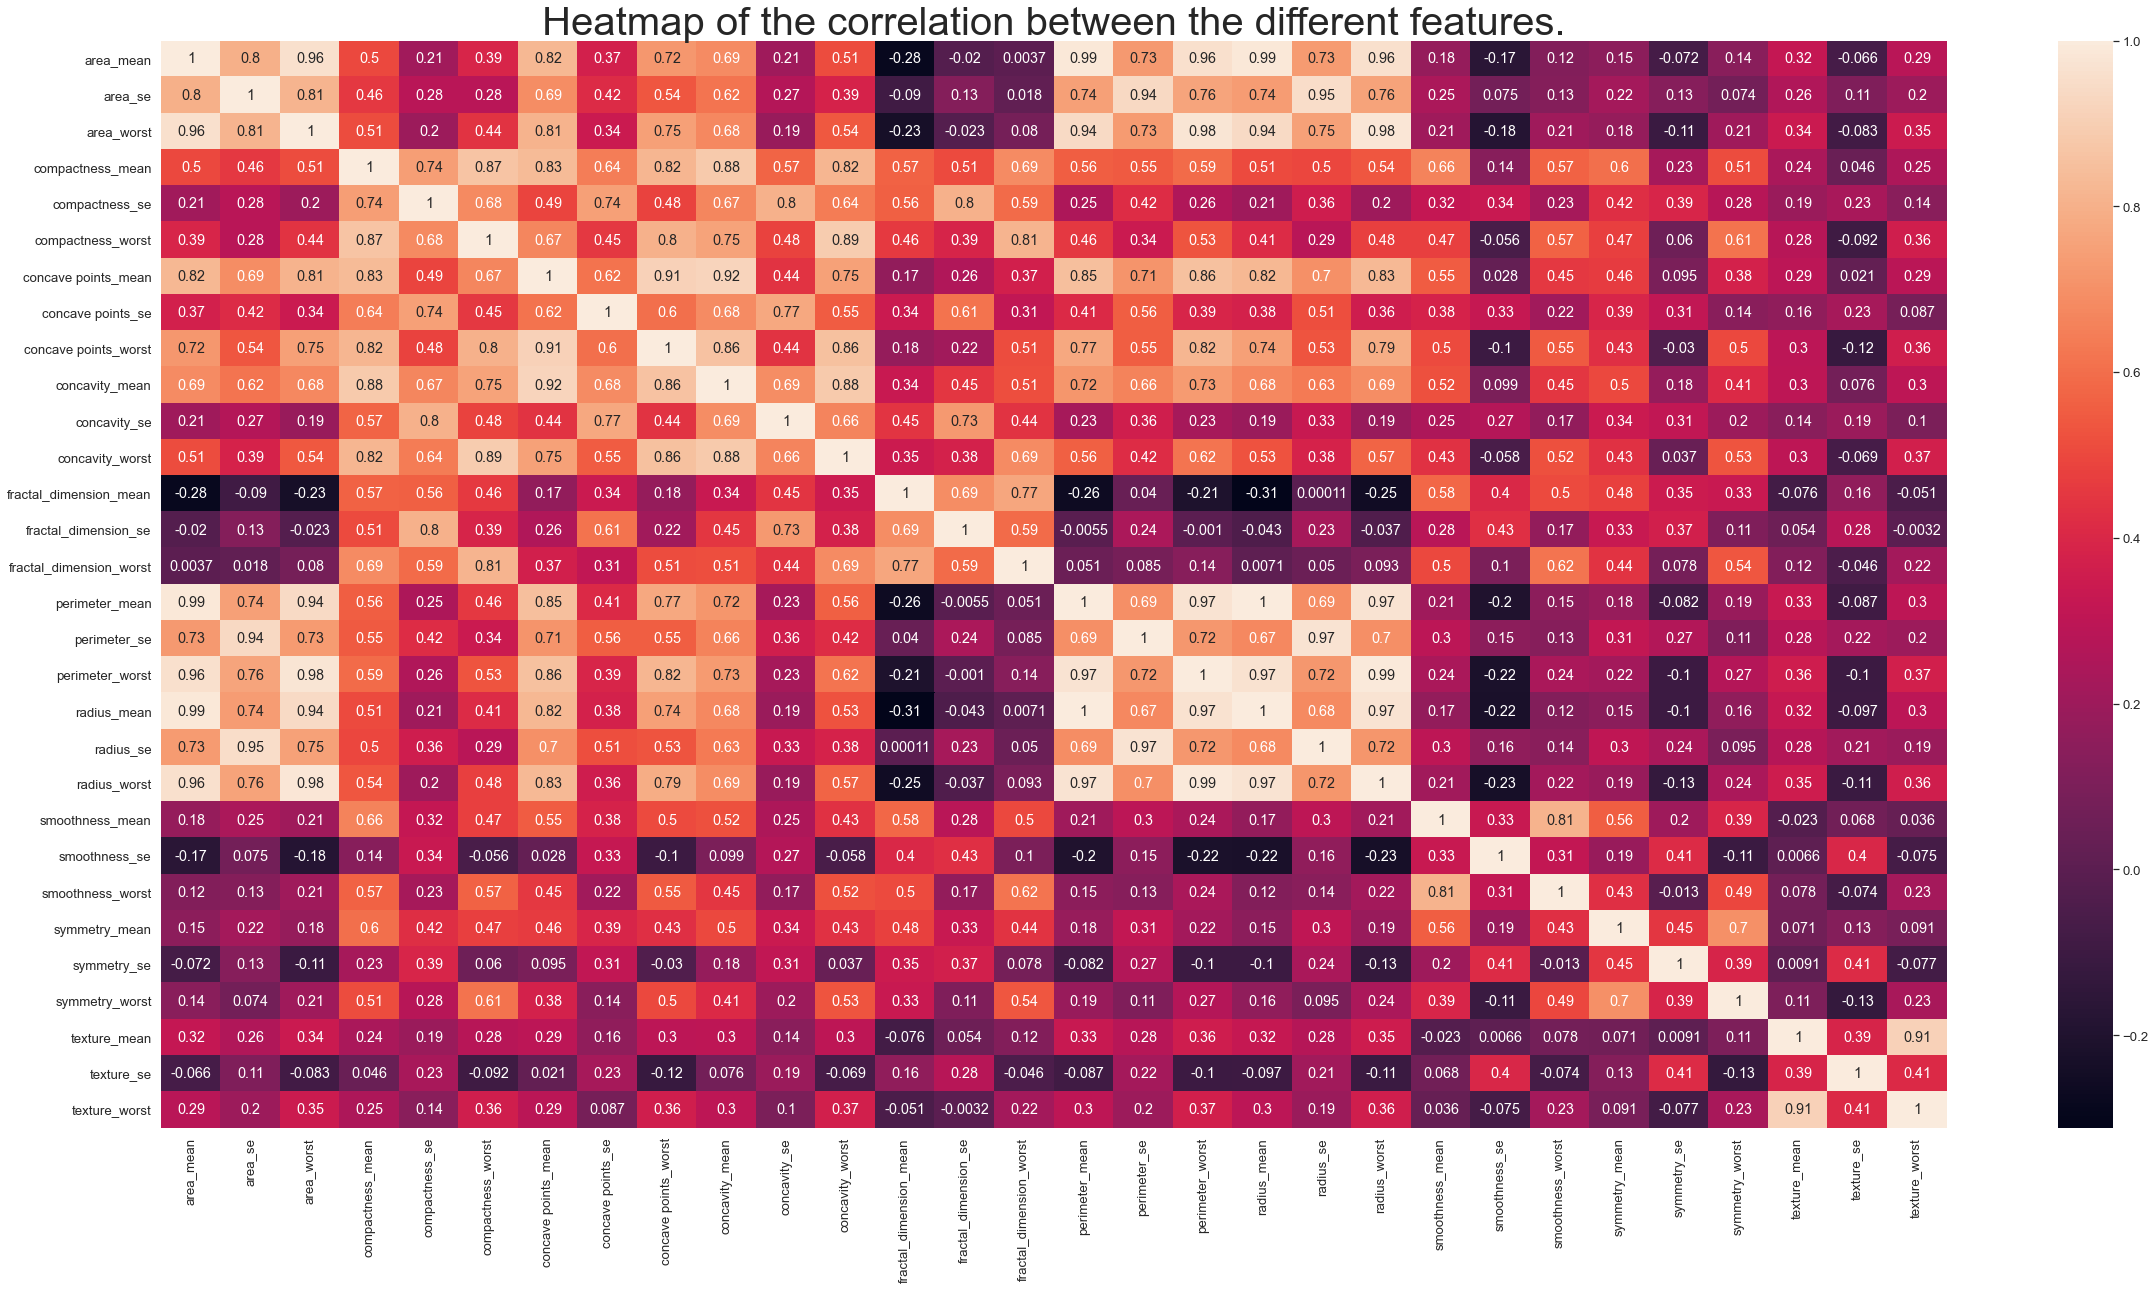

In [38]:
_ = plt.figure(figsize=(40,20))
_ = sns.heatmap(df_attributes.corr(), annot = True)
_ = plt.title('Heatmap of the correlation between the different features.', fontsize = 40)
sns.set(font_scale=1.4)
plt.show()

Diagnosis seems to have correlations with the area, compactness, concave points, concavity, perimeter, radius of the tumours. Whilst diagnosis is our target group, diagnosis can only have two values: 1 or 0. So, at this point I'll be exploring these 6 features to explore and identify if they have any associations with each other. 

In [39]:
interesting_attributes = df_attributes[['area_mean', 'area_se', 'area_worst','compactness_mean',
       'compactness_se', 'compactness_worst', 'concave points_mean',
       'concave points_se', 'concave points_worst', 'concavity_mean',
       'concavity_se', 'concavity_worst','perimeter_mean', 'perimeter_se',
       'perimeter_worst', 'radius_mean', 'radius_se', 'radius_worst']]

In [ ]:
_ = sns.pairplot(interesting_attributes)
plt.show()

In [ ]:
interesting_attributes.corr()

In [ ]:
_ = plt.figure(figsize=(30,20))
_ = sns.heatmap(interesting_attributes.corr(), annot = True)
_ = plt.title('Heatmap of the correlation between the different features.', fontsize = 40)
sns.set(font_scale=2)
plt.show()

Let's look closer at the mean area with features which show high correlations: the mean radius and the mean perimeter

In [ ]:
#mean radius and area: correlation coefficient = 0.99
_ = plt.figure(figsize=(10,10))
_ = sns.scatterplot(x='radius_mean', y='area_mean', data = interesting_attributes)
_ = plt.title('Scatterplot of mean area of tumours with change in the mean radius')
plt.show()

Whilst the correlation coefficient is high (0.99) the fit doesn't seem to be linear. Let's try a quadratic fit. 

In [ ]:
#mean radius and area: correlation coefficient = 0.99
_ = plt.figure(figsize=(10,10))
_ = sns.regplot(x='radius_mean', y='area_mean', data = interesting_attributes, order=1)
_ = sns.regplot(x='radius_mean', y='area_mean', data = interesting_attributes, order=2)
_ = plt.title('Regression of mean area of tumours with change in the mean radius')
_ = plt.savefig('mean_area_vs_raidus.png', bbox_inches='tight')
plt.show()

The orange line does seem to be a little better- this is the quadratic fit. 

In [ ]:
#mean area and perimeter: correlation coefficient = 0.99
_ = plt.figure(figsize=(10,10))
_ = sns.scatterplot(x='perimeter_mean', y='area_mean', data = interesting_attributes)
_ = plt.title('Scatterplot of mean area of tumours with change in the perimeter')

In [ ]:
#mean area and perimeter: correlation coefficient = 0.99
_ = plt.figure(figsize=(10,10))
_ = sns.regplot(x='perimeter_mean', y='area_mean', data = interesting_attributes, order=2)
_ = plt.title('Regression plot of mean area of tumours with change in the perimeter')

A quadratic regression here again seems to be a better fit

In [ ]:
#mean area and concavity: correlation coefficient = 0.69
_ = plt.figure(figsize=(10,10))
_ = sns.scatterplot(x='concavity_mean', y='area_mean', data = interesting_attributes)
_ = plt.title('Scatterplot of mean area of tumours with change in the concavity')

In [ ]:
#mean area and concavity: correlation coefficient = 0.69
_ = plt.figure(figsize=(10,10))
_ = sns.regplot(x='concavity_mean', y='area_mean', data = interesting_attributes)
_ = plt.title('Regression plot of mean area of tumours with change in the concavity')
_ = plt.savefig('mean_area_concavity.png', bbox_inches='tight')

It is hard to determine if the mean area and the mean concavity can have a linear association, even though the correlation coefficient is 0.69. So, I'll make a linear model to see if the area can be predicted by changes of the concavity reliably or not. 

## Linear Regression Model for Mean Area

In [ ]:
#Subset the data: 
X = interesting_attributes[['concavity_mean']]
X = sm.add_constant(X)

y = interesting_attributes[['area_mean']]
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=123)

In [ ]:
#check shape of test and train set 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
ols_model = sm.OLS(y_train, X_train)
results = ols_model.fit()
results.summary()

The above R-Squared value is very low: explaining only 44% of the variations from the mean. 

In [ ]:
predictions = results.predict(X_test)

In [ ]:
# Let's plot the predictions against the observed results
_ = plt.figure(figsize = (10,10))
_ = sns.regplot(x = y_test, y =predictions)
_ = plt.xlabel('Observed values')
_ = plt.ylabel('Predictions')
_ = plt.title('Predictions vs Actual for the mean area of tumours.')

## Multiple Linear Regression

In [ ]:
#Subset the data: 
X = interesting_attributes.drop('area_mean', axis=1)
X = sm.add_constant(X)

y = interesting_attributes[['area_mean']]
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=123)

In [ ]:
ols_model_2 = sm.OLS(y_train, X_train)
results_2 = ols_model_2.fit()
results_2.summary()

Next, drop radius and perimeter as they do not have a linear association with area and the features that are highly correlated with these two features, and associated area, radius and perimeter feautures to eliminate redundancies

In [ ]:
#Subset the data: 
X = interesting_attributes.drop(['area_mean', 'area_se', 'area_worst',
                                 'radius_mean', 'radius_se', 'radius_worst',
                                 'perimeter_mean', 'perimeter_se', 'perimeter_worst'], axis=1)
X = sm.add_constant(X)

y = interesting_attributes[['area_mean']]
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=123)

In [ ]:
ols_model_3 = sm.OLS(y_train, X_train)
results_3 = ols_model_3.fit()
results_3.summary()